# Prediction of O$_2$ tendency components

O2 budget data from DPLE:
/glade/p_old/decpred/CESM-DPLE/postproc/O2_budget_npac/
  
The *.annmean.nc files are the raw annual budget terms and the *.anom.nc files have been drift-corrected (removed lead-time dependent 1964-2014 climatology). The latter can be directly compared to FOSI annual mean budget anomalies (relative to 1964-2014 climatology).


In [1]:
%matplotlib inline
import os
from subprocess import call
from glob import glob

import xarray as xr
import numpy as np
import dask

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

import project as P
import geotools as gt
import plottools as pt
import cmocean

USER = os.environ['USER']

In [2]:
from dask.distributed import Client
from dask_jobqueue import PBSCluster

dask.config.set({'distributed.dashboard.link':'http://localhost:{port}/status'})

# Lots of arguments to this command are set in ~/.config/dask/jobqueue.yaml
cluster = PBSCluster(queue='regular',
                     cores = 36,
                     processes = 9,
                     memory = '100GB',                     
                     project = 'NCGD0033',
                     walltime = '04:00:00',
                     local_directory=f'/glade/scratch/{USER}/dask-tmp')
client = Client(cluster)

In [3]:
Nnodes = 6
cluster.scale(9*Nnodes)

In [4]:
client

Client Scheduler: tcp://10.148.10.17:35286 Dashboard: http://localhost:8787/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


# Read FOSI dataset

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.]])

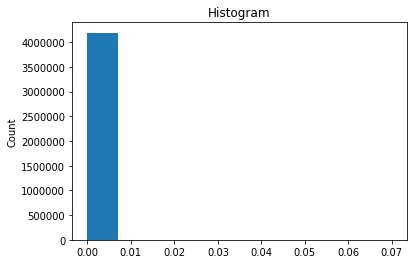

In [5]:
import importlib
importlib.reload(P)
m = P.region_mask()
m.isel(region=0).plot()
m.sum(['nlat','nlon']).values

# subset to forecast years; apply running mean filter to FOSI

create and apply a function for computing regional means (and save attributes)

# Make some plots

Set some general features

In [6]:
obs_color = '#e41a1c'
dp_color = '#d95f02'
dp_shade = '#fdcdac'
fosi_color = '#377eb8'

## plot O2 time series itself

In [28]:
region_name = 'CalCOFI'
forecast_lead = (1,5)
ds = P.dataview(forecast_lead=forecast_lead,apply_region_mask=True)
for v,dsi in ds.items():
    ds[v] = dsi.sel(region=region_name)

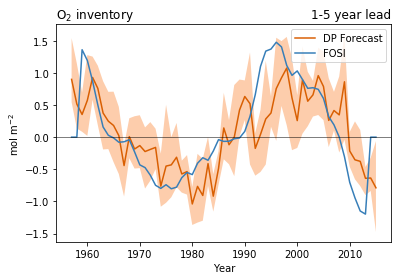

In [29]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

v = 'O2_zint'
xdp = ds['dp'].time
ydp = ds['dp'][v].mean(dim='M')
ydpmin = ds['dp'][v].min(dim='M')
ydpmax = ds['dp'][v].max(dim='M')
xfosi = ds['fosi'].time
yfosi = ds['fosi'][v]

ax.fill_between(xdp, ydpmin, ydpmax,facecolor=dp_shade)
ax.plot(xdp,ydp,color=dp_color,linewidth=1.5,label='DP Forecast')
ax.plot(xfosi,yfosi,color=fosi_color,linewidth=1.5,label='FOSI')

ax.axhline(0,linewidth=0.5,color='k')
ax.set_ylabel(f"{ds['fosi'][v].attrs['units']}")
ax.set_xlabel('Year')
ax.set_title(f"{ds['fosi'][v].attrs['long_name']}",loc='left')
ax.set_title(f'{forecast_lead[0]}-{forecast_lead[1]} year lead',loc='right')              
plt.legend()
plt.savefig(f'{P.dirf}/CESM-DPLE-forecast-{region_name}-{v}-{forecast_lead[0]}-{forecast_lead[1]}.pdf',dpi=300,bbox_inches='tight')

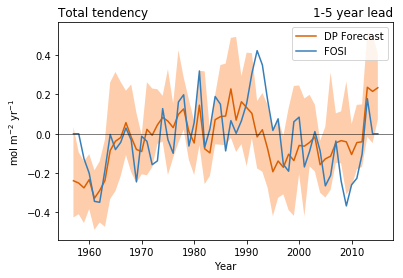

In [30]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

v = 'O2_rhs_tend'
xdp = ds['dp'].time
ydp = ds['dp'][v].mean(dim='M')
ydpmin = ds['dp'][v].min(dim='M')
ydpmax = ds['dp'][v].max(dim='M')
xfosi = ds['fosi'].time
yfosi = ds['fosi'][v]

ax.fill_between(xdp, ydpmin, ydpmax,facecolor=dp_shade)
ax.plot(xdp,ydp,color=dp_color,linewidth=1.5,label='DP Forecast')
ax.plot(xfosi,yfosi,color=fosi_color,linewidth=1.5,label='FOSI')

ax.axhline(0,linewidth=0.5,color='k')
ax.set_ylabel(f"{ds['fosi'][v].attrs['units']}")
ax.set_xlabel('Year')
ax.set_title(f"{ds['fosi'][v].attrs['long_name']}",loc='left')
ax.set_title(f'{forecast_lead[0]}-{forecast_lead[1]} year lead',loc='right')              
plt.legend()
plt.savefig(f'{P.dirf}/CESM-DPLE-forecast-{region_name}-{v}-{forecast_lead[0]}-{forecast_lead[1]}.pdf',dpi=300,bbox_inches='tight')             

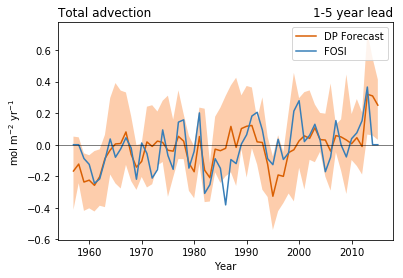

In [31]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

v = 'O2_adv'
xdp = ds['dp'].time
ydp = ds['dp'][v].mean(dim='M')
ydpmin = ds['dp'][v].min(dim='M')
ydpmax = ds['dp'][v].max(dim='M')
xfosi = ds['fosi'].time
yfosi = ds['fosi'][v]

ax.fill_between(xdp, ydpmin, ydpmax,facecolor=dp_shade)
ax.plot(xdp,ydp,color=dp_color,linewidth=1.5,label='DP Forecast')
ax.plot(xfosi,yfosi,color=fosi_color,linewidth=1.5,label='FOSI')

ax.axhline(0,linewidth=0.5,color='k')
ax.set_ylabel(f"{ds['fosi'][v].attrs['units']}")
ax.set_xlabel('Year')
ax.set_title(f"{ds['fosi'][v].attrs['long_name']}",loc='left')
ax.set_title(f'{forecast_lead[0]}-{forecast_lead[1]} year lead',loc='right')              
plt.legend()
plt.savefig(f'{P.dirf}/CESM-DPLE-forecast-{region_name}-{v}-{forecast_lead[0]}-{forecast_lead[1]}.pdf',dpi=300,bbox_inches='tight')             

## plot terms in balance

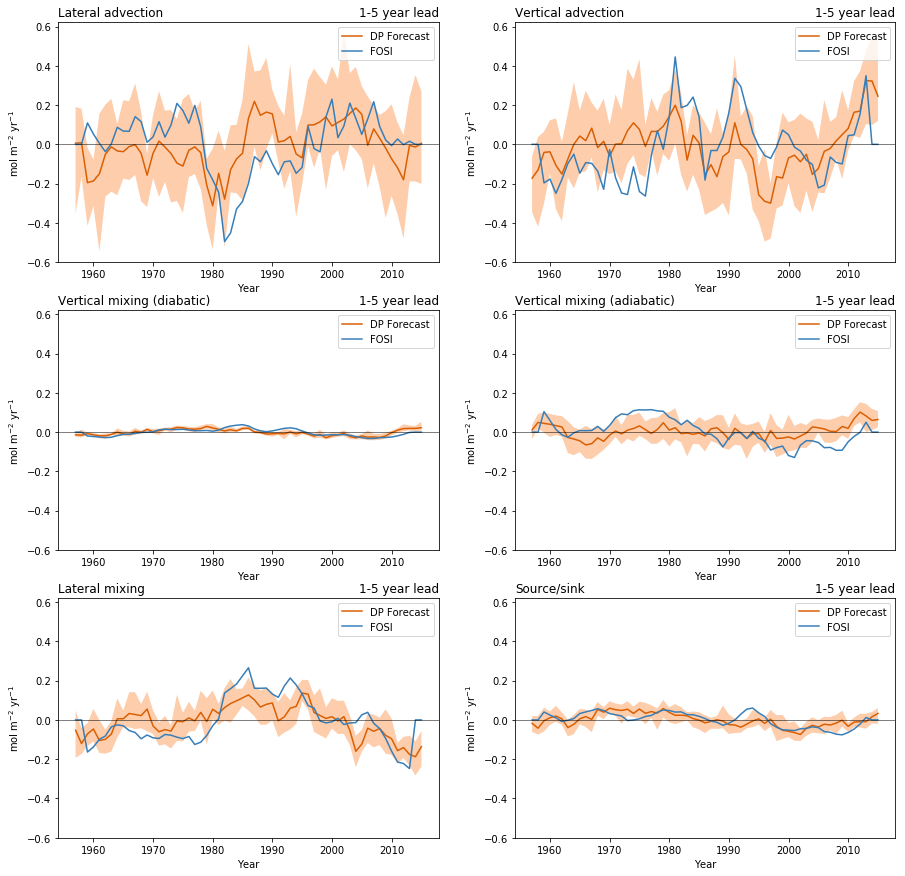

In [32]:
fig = plt.figure(figsize=(15,15))

variables = ['O2_lat_adv_res','O2_vert_adv_res',
             'O2_dia_vmix','O2_adi_vmix',
             'O2_lat_mix','O2_sms']

ax = []
ylm = np.zeros((3*2,2))

for i,v in enumerate(variables):
    axi = fig.add_subplot(3,2,i+1)

    xdp = ds['dp'].time
    ydp = ds['dp'][v].mean(dim='M')
    ydpmin = ds['dp'][v].min(dim='M')
    ydpmax = ds['dp'][v].max(dim='M')
    xfosi = ds['fosi'].time
    yfosi = ds['fosi'][v]

    axi.fill_between(xdp, ydpmin, ydpmax,facecolor=dp_shade)
    axi.plot(xdp,ydp,color=dp_color,linewidth=1.5,label='DP Forecast')
    axi.plot(xfosi,yfosi,color=fosi_color,linewidth=1.5,label='FOSI')

    axi.axhline(0,linewidth=0.5,color='k')
    axi.set_ylabel(f"{ds['fosi'][v].attrs['units']}")
    axi.set_xlabel('Year')
    axi.set_title(f"{ds['fosi'][v].attrs['long_name']}",loc='left')
    axi.set_title(f'{forecast_lead[0]}-{forecast_lead[1]} year lead',loc='right')           

    ylm[i,:] = axi.get_ylim()
    
    plt.legend()
    ax.append(axi)

ylm = [ylm[:,0].min(),ylm[:,1].max()]
plt.savefig(f'{P.dirf}/CESM-DPLE-forecast-{region_name}-budget-terms-diff-axes-{forecast_lead[0]}-{forecast_lead[1]}.pdf',dpi=300,bbox_inches='tight')
                  
for axi in ax:
    axi.set_ylim(ylm)
                 
plt.savefig(f'{P.dirf}/CESM-DPLE-forecast-{region_name}-budget-terms-same-axes-{forecast_lead[0]}-{forecast_lead[1]}.pdf',dpi=300,bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize=(15,15))

variables = ['O2_lat_adv_res','O2_vert_adv_res',
             'O2_dia_vmix','O2_adi_vmix',
             'O2_lat_mix','O2_sms']

ax = []
ylm = np.zeros((3*2,2))

for i,v in enumerate(variables):
    axi = fig.add_subplot(3,2,i+1)

    xdp = ds['dp'].time
    ydp = ds['dp'][v].mean(dim='M')
    ydpmin = ds['dp'][v].min(dim='M')
    ydpmax = ds['dp'][v].max(dim='M')
    xfosi = ds['fosi'].time
    yfosi = ds['fosi'][v]

    axi.fill_between(xdp, ydpmin, ydpmax,facecolor=dp_shade)
    axi.plot(xdp,ydp,color=dp_color,linewidth=1.5,label='DP Forecast')
    axi.plot(xfosi,yfosi,color=fosi_color,linewidth=1.5,label='FOSI')

    axi.axhline(0,linewidth=0.5,color='k')
    axi.set_ylabel(f"{ds['fosi'][v].attrs['units']}")
    axi.set_xlabel('Year')
    axi.set_title(f"{ds['fosi'][v].attrs['long_name']}",loc='left')
    axi.set_title(f'{forecast_lead[0]}-{forecast_lead[1]} year lead',loc='right')           

    ylm[i,:] = axi.get_ylim()
    
    plt.legend()
    ax.append(axi)

ylm = [ylm[:,0].min(),ylm[:,1].max()]

for axi in ax:
    axi.set_ylim(ylm)
                  
#plt.savefig(f'{dirf}/CESM-DPLE-O2-forecast-{region_name}-budget-terms.pdf',dpi=300,bbox_inches='tight')                  

## look at predictability as a function of lag

In [ ]:
v = 'O2_zint'
r = np.zeros((10))
for i in range(10):
    ds = P.dataview(forecast_lead=i+1,apply_region_mask=True)
    r[i] = P.xcorr(ds['dp'][v].sel(region=region_name).mean('M'),
                   ds['fosi'][v].sel(region_region_name),
                   dim='time')
plt.plot(r)